# Filter introduction

Whats done here

In [1]:
import numpy as num
import matplotlib.pyplot as plt

from scipy import signal

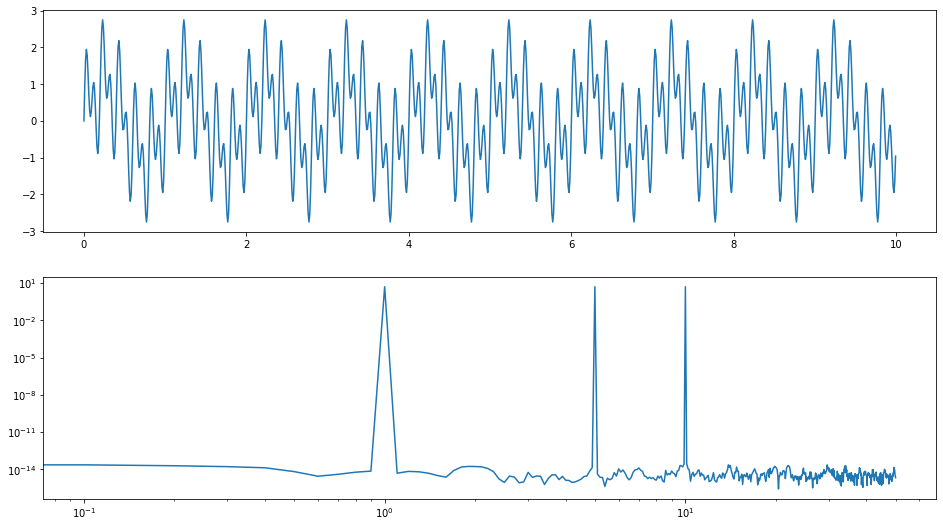

In [2]:
df = 100  # Sampling frequency [Hz]
timelen = 10  # Länger der Zeitspur [s]
dt = 1 / df  # Abtastintervall [s]

nyquist = df / 2

numsamples = timelen * df
xdata = num.arange(numsamples) / df

sin1 = 1.
sin2 = 10.
sin3 = 5
ydata = num.sin(2 * num.pi * sin1 * xdata) + num.sin(2 * num.pi * sin2 * xdata) + num.sin(2 * num.pi * sin3 * xdata)

amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(xdata), d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(xdata, ydata)
ax = plt.subplot(2, 1, 2)
# ax.plot(freqs, amps)
ax.loglog(freqs, amps)

plt.show()

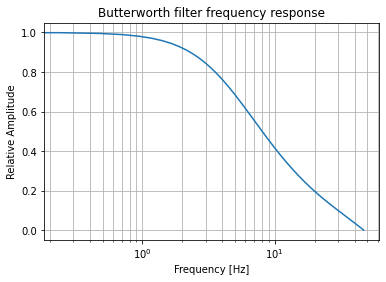

In [3]:
# Filter requirements.
filterfreq = 5
order = 1

# One gotcha is that Wn is a fraction of the Nyquist frequency (half the sampling frequency).
# So if the sampling rate is 1000Hz and you want a cutoff of 250Hz, you should use Wn=0.5.
ws = filterfreq / nyquist

b, a = sos = signal.butter(order, ws, 'lowpass')
#b, a = sos = signal.butter(order, ws, 'highpass')
w, h = signal.freqz(b, a, int((1/filterfreq) * 1000)) # last argument just to optimize the display quality

weirdfactor = 15 ## there is a weird factor needed to show the response correctly... 

plt.figure()
plt.semilogx(w*weirdfactor, abs(h) / max(abs(h)))
plt.title('Butterworth filter frequency response')
plt.grid(which='both', axis='both')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Relative Amplitude')

plt.show()

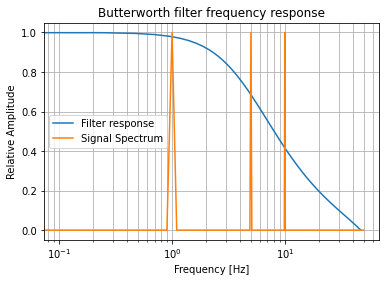

In [4]:
amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(xdata), d=dt)

plt.figure()
plt.semilogx(w*weirdfactor, abs(h) / max(abs(h)), label='Filter response')
plt.semilogx(freqs, amps / max(amps), label='Signal Spectrum')

plt.title('Butterworth filter frequency response')
plt.grid(which='both', axis='both')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Relative Amplitude')
plt.legend()
plt.show()

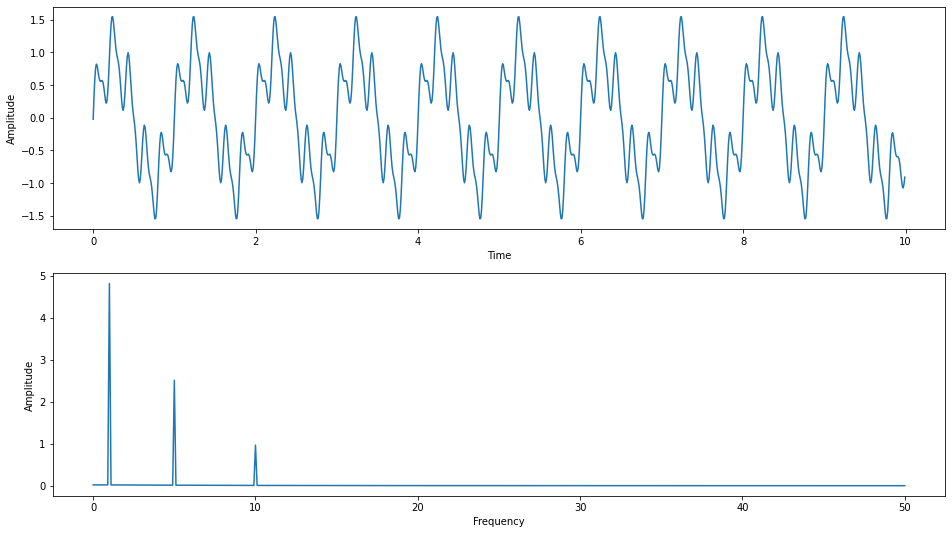

In [5]:
yfilt = signal.filtfilt(b, a, ydata)

amps = abs(num.fft.rfft(yfilt)) * dt
freqs = num.fft.rfftfreq(len(yfilt), d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')

ax.plot(xdata, yfilt)
ax = plt.subplot(2, 1, 2)
ax.plot(freqs, amps)
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
#ax.loglog(freqs, amps)

plt.show()

# Tasks
- change low to high
- change frequencies
- change order

# Bandpass

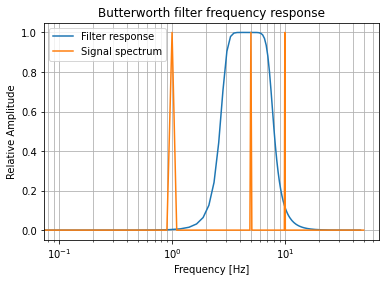

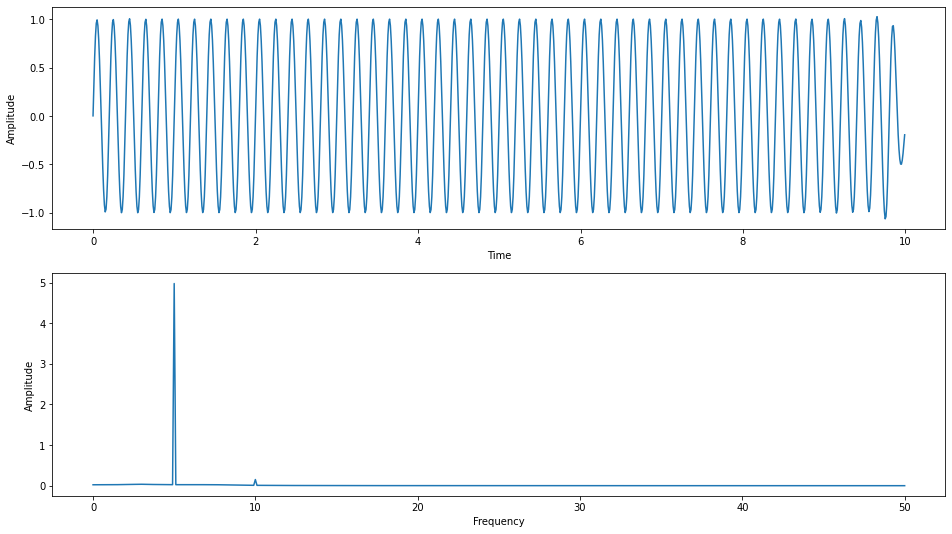

In [9]:
# Filter requirements.
filterfreq1 = 3
filterfreq2 = 8
order = 4

# One gotcha is that Wn is a fraction of the Nyquist frequency (half the sampling frequency).
# So if the sampling rate is 1000Hz and you want a cutoff of 250Hz, you should use Wn=0.5.
ws1 = filterfreq1 / nyquist
ws2 = filterfreq2 / nyquist

b, a = sos = signal.butter(order, [ws1, ws2], 'bandpass')
#b, a = sos = signal.butter(order, [ws1, ws2], 'bandstop')

w, h = signal.freqz(b, a, int((1/filterfreq) * 1000)) # last argument just to optimize the display quality

weirdfactor = 15 ## there is a weird factor needed to show the response correctly... 


amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(xdata), d=dt)

plt.figure()
plt.semilogx(w*weirdfactor, abs(h) / max(abs(h)), label='Filter response')
plt.semilogx(freqs, amps / max(amps), label='Signal spectrum')

plt.title('Butterworth filter frequency response')
plt.grid(which='both', axis='both')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Relative Amplitude')
plt.legend()
plt.show()


yfilt = signal.filtfilt(b, a, ydata)

amps = abs(num.fft.rfft(yfilt)) * dt
freqs = num.fft.rfftfreq(len(yfilt), d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(xdata, yfilt)
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')

ax = plt.subplot(2, 1, 2)
ax.plot(freqs, amps)
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
#ax.loglog(freqs, amps)

plt.show()